In [ ]:
# !pip install numpy pandas scikit-learn wandb matplotlib


In [4]:
import wandb

wandb.login(key="6ec8cb40fe484cd9560d297f1a59e5251e56fe58")



wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Aditya\_netrc
wandb: Currently logged in as: aditya-masutey-ug23 (aditya-masutey-ug23-plaksha-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
wandb.init(project="distance_classification_project", name="KMeans_Clustering")

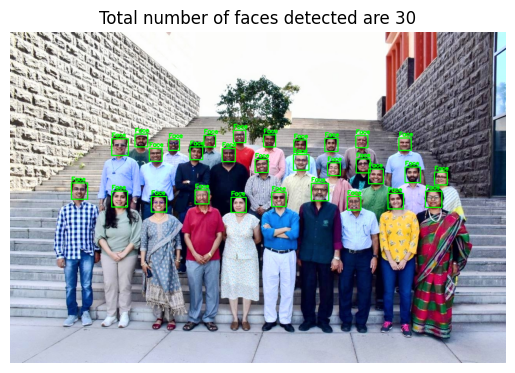

In [8]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')
rgb_pf = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## Convert the image to grayscale
gray_img = cv2.cvtColor(rgb_pf, cv2.COLOR_RGB2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX ## Font type
font_scale = 0.5 ## Font scale factor
font_color = (0, 255, 0)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(rgb_pf, (x, y), (x+w, y+h), (0, 255, 0), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(rgb_pf, text, (x, y - 5), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
plt.imshow(rgb_pf)
plt.title(f"Total number of faces detected are {len(faces_rect)}")
plt.axis("off")
plt.savefig("detected_faces_img.png")
wandb.log({"FACES": wandb.Image("detected_faces_img.png")})
plt.show()

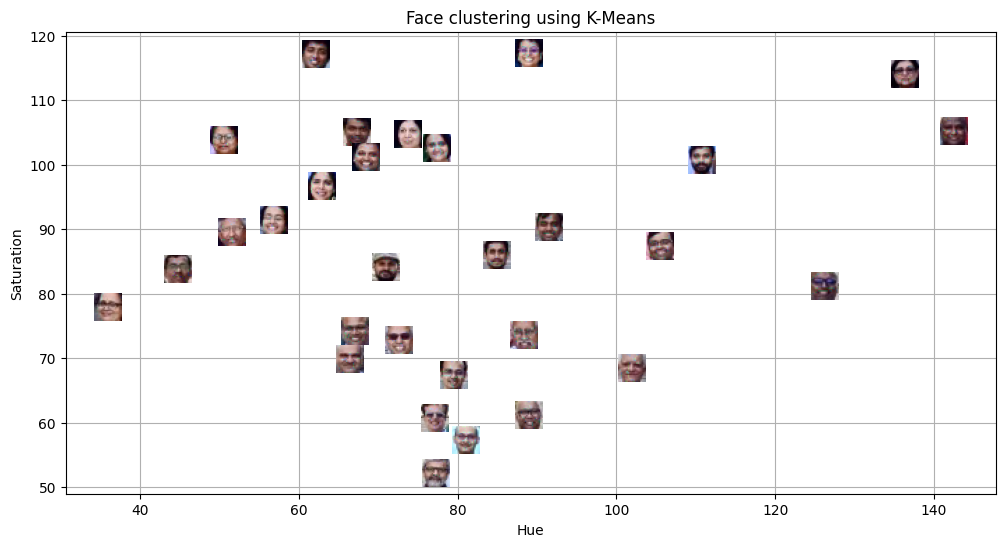

In [9]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters = 2, random_state = 45, n_init = 30).fit(hue_saturation)


# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Face clustering using K-Means")
## Put grid
plt.grid()
## show the plot
plt.savefig("face_clustering_plt.png")
wandb.log({"face clustering": wandb.Image("face_clustering_plt.png")})
plt.show()

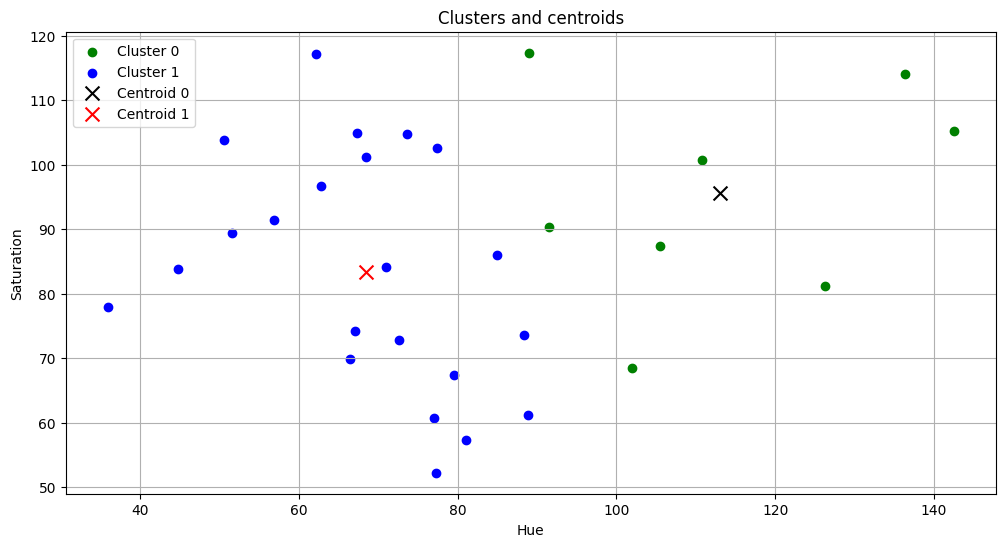

In [10]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color = 'green', label = 'Cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'blue', label = 'Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], color = 'black', marker = 'x', s = 100, label = 'Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], color = 'red', marker = 'x', s = 100, label = 'Centroid 1')
## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters and centroids")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.savefig("clusters and centroids.png")
wandb.log({"Cluster Visualization": wandb.Image("clusters and centroids.png")})
plt.show()

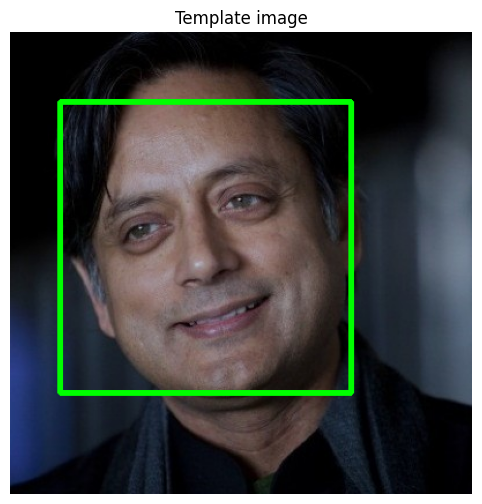

In [11]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
rgb_temp = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)
gray_temp = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

template_faces = face_cascade.detectMultiScale(gray_temp, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(rgb_temp, (x, y), (x + w, y + h), (0, 255, 0), 3)
plt.figure(figsize = (8, 6))
plt.imshow(rgb_temp)
plt.title("Template image")
plt.axis("off")
plt.savefig("template image.png")
wandb.log({"face detected": wandb.Image("template image.png")})

plt.show()    

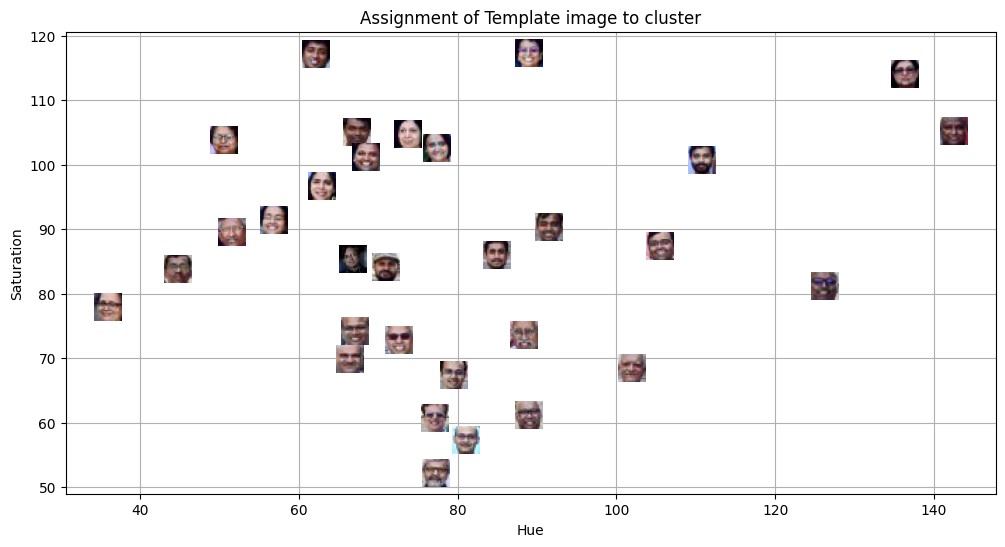

In [12]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Assignment of Template image to cluster")
## Add grid
plt.grid()
## show plot
plt.savefig("Assignment of Template image to cluster.png")
wandb.log({"assigenment of template": wandb.Image("Assignment of Template image to cluster.png")})
plt.show()

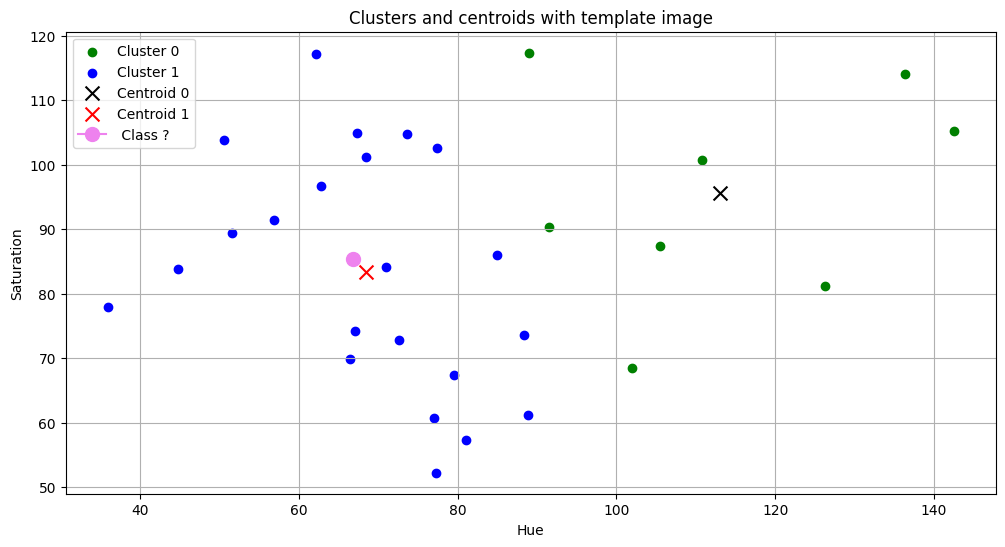

In [13]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], color = 'green', label = 'Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], color = 'blue', label = 'Cluster 1')

# Calculate and plot centroids
centroid_0 = kmeans.cluster_centers_[0]
centroid_1 = kmeans.cluster_centers_[1]


plt.scatter(centroid_0[0], centroid_0[1], color = 'black', marker = 'x', s = 100, label = 'Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], color = 'red', marker = 'x', s = 100, label = 'Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )
## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clusters and centroids with template image")
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.savefig("clusters and centroids wtih template image.png")
wandb.log({"template Cluster visualization": wandb.Image("clusters and centroids wtih template image.png")})
plt.show()
                                            ## End of the lab 5 ##

#### 1. What are the common distance metrics used in distance-based classification algorithms? 

1. Eucleadian distance : Represents the shortest distance between two vectors. 
2.  Manhattan distance : a way to measure the distance between two points by adding up the absolute differences of their coordinates.
3. Mahalanobis Distance : Represents the distance between a point P and a distribution D by measuring how many standard deviations away P is from the mean of D

   
#### 2. What are some real-world applications of distance-based classification algorithms? 
Anomaly and Fraud Detection,
Face Recognition,
Malware Categorization,
Disease Classification.
#### 3. Explain various distance metrics. 
1. Chebyshev Distance: Also known as Chessboard distance, because in Chess it equals
the minimum number of moves needed by a king to go from one square on a chessboard to another.
2. Minkowski Distance: A generalized distance metric which can be modified by substituting the value of ‘p’ to calculate the distance between two points.

If p = 1, Manhattan Distance, called L1 norm

If p = 2, Euclidean Distance, called L2 norm

If p = ∞, Chebychev Distance, called L∞ norm

4. Cosine Distance: Degree of angle between two vectors (called frequencies for words in documents). It is used when the magnitude does not matter but rather their orientation matters.
#### 4. What is the role of cross validation in model performance? 
* Prevents overfitting by testing on different subsets of data.
* K-fold cross-validation: Splits data into k parts, trains on k-1, tests on the remaining, repeats k times.
* Improves reliability by averaging performance across multiple splits.
* Reduces bias & variance compared to a single train-test split.
* Essential for model selection and hyperparameter tuning.
#### 5. Explain variance and bias in terms of KNN? 
Bias: The error due to overly simplistic assumptions in the model.
* Small k : Low bias (follows training data closely).
* large k : High bias (overly smooth decision boundary).
  
Variance: The error due to excessive sensitivity to training data.

* Small k : High variance (sensitive to noise).
* Large k:  Low variance (more stable but may underfit).